## Ridge Regression

### House price prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('F:\Dataset\Real_estate.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      400 non-null    int64  
 1   X1 transaction date                     400 non-null    float64
 2   X2 house age                            400 non-null    float64
 3   X3 distance to the nearest MRT station  400 non-null    float64
 4   X4 number of convenience stores         400 non-null    int64  
 5   X5 latitude                             400 non-null    float64
 6   X6 longitude                            400 non-null    float64
 7   Y house price of unit area              400 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 25.1 KB


In [3]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
395,396,2012.917,21.2,512.54870,4,24.97400,121.53842,42.5
396,397,2012.667,37.1,918.63570,1,24.97198,121.55063,31.9
397,398,2013.417,13.1,1164.83800,4,24.99156,121.53406,32.2
398,399,2013.417,14.7,1717.19300,2,24.96447,121.51649,23.0


In [4]:
data = df.drop(['No','Y house price of unit area'], axis=1)
data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
395,2012.917,21.2,512.54870,4,24.97400,121.53842
396,2012.667,37.1,918.63570,1,24.97198,121.55063
397,2013.417,13.1,1164.83800,4,24.99156,121.53406
398,2013.417,14.7,1717.19300,2,24.96447,121.51649


In [5]:
#creating 2 variables, x and y
x = data
y = df['Y house price of unit area']

In [6]:
#standardizing x and y
x_scaler = StandardScaler()
x_scaled = x_scaler.fit_transform(x)
y = (y - y.mean())/y.std()

In [7]:
#splitting dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
Linreg = LinearRegression()
Linreg.fit(x_train, y_train)

LinearRegression()

In [10]:
Linreg.coef_

array([ 0.10372407, -0.216939  , -0.42389726,  0.22845888,  0.21780384,
       -0.00671817])

In [11]:
columns_coef_data = pd.DataFrame({'columns':data.columns, 'coef':Linreg.coef_})

In [12]:
#sorting the features by coefficient values in descending order
sorted_coef = columns_coef_data.sort_values('coef', ascending = False)

### Plotting the Coefficient Values

Text(0, 0.5, 'Features')

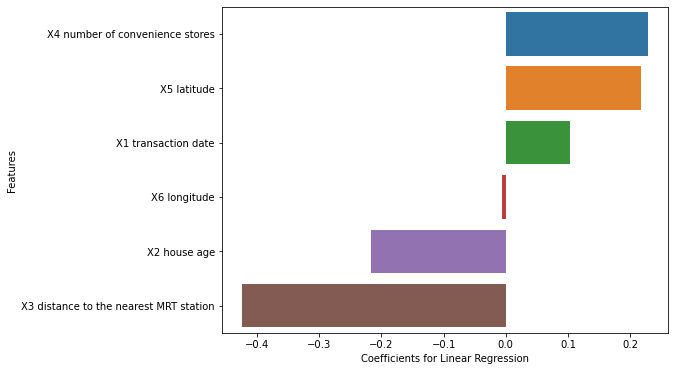

In [13]:
plt.figure(figsize =(8,6))
sns.barplot(x='coef',y='columns', data = sorted_coef);
plt.xlabel('Coefficients for Linear Regression')
plt.ylabel('Features')

#### Observations: 1. Number of convenience stores is the top influential feature which determines the House price of unit area.
####                          2. Higher the distance to the nearest metro station has negative effect on House price.

In [14]:
#Calculate RMSE
from sklearn import metrics

In [15]:
def get_train_test_rmse(model):  #takes the model as parameter and print RMSE on train and test set
    y_train_pred = model.predict(x_train)  #predicting on training dataset
    rmse_train = round(np.sqrt(mean_squared_error(y_train,y_train_pred)),3)  #compare the actual y with predicted y in training dataset
    y_test_pred = model.predict(x_test) #predicting on test dataset
    rmse_test = round(np.sqrt(mean_squared_error(y_test,y_test_pred)),3)  #compare the actual y with predicted y in test dataset
    print('train:',rmse_train,'test:',rmse_test)

In [16]:
get_train_test_rmse(Linreg)

train: 0.65 test: 0.646


### Applying Regularization - Ridge Regression

In [17]:
#applying alpha=1 and running the algorithm for maximum 500 iterations.
ridge = Ridge(alpha = 1, max_iter =500)
ridge.fit(x_train, y_train)

Ridge(alpha=1, max_iter=500)

In [18]:
get_train_test_rmse(ridge)

train: 0.65 test: 0.646


In [20]:
#applying alpha = 2 and running algorithm for max 1000 iterations. 
ridge2 = Ridge(alpha = 2.0, max_iter = 1000)
ridge2.fit(x_train, y_train)
get_train_test_rmse(ridge2)

train: 0.65 test: 0.646


## Lasso Regression

In [21]:
from sklearn.linear_model import Lasso

In [22]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(x_train, y_train)
get_train_test_rmse (lasso)

train: 0.65 test: 0.647


### Conclusion: Model is not overfitting. We can see the difference between RMSE train and RMSE test is very small. That's why there is no use of regularization.